In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Full_Monthly.csv")

In [3]:
data.head()

,Unnamed: 0,Date,Ticker,Sector,Industry,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
0,1,1998-07-01,BAX,"Consumer, Non-cyclical",Healthcare-Products,146.000,15118.3532,25.5814,17.000,46.0888,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,72.402903,38.26,24.799999,NaN
1,2,1998-07-01,VOD,Communications,Telecommunications,NaN,256921.1418,NaN,NaN,NaN,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,78.340585,38.26,24.799999,NaN
2,3,1998-07-01,PXD,Energy,Oil&Gas,91.369,2398.8883,45.2357,-56.929,23.5375,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,147.188061,38.26,24.799999,NaN
3,4,1998-07-01,KMI,Energy,Pipelines,453.000,36519.0472,27.3650,-10.000,34.1947,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,113.533557,38.26,24.799999,NaN
4,5,1998-07-01,AZN,"Consumer, Non-cyclical",Pharmaceuticals,311.000,82119.0000,28.0482,-203.000,69.4947,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,60.176544,38.26,24.799999,NaN


In [4]:
data[data.Date == data.Date.min()].shape

(116, 82)

In [5]:
data[data.Date == data.Date.max()].shape

(210, 82)

In [19]:
cpi = pd.read_csv("Consumer_Price_Index_CPI.csv")

In [21]:
Date_list = list(data[data.Date > '2012-12-01'].Date.unique())

In [22]:
OAS = list(data[data.Date > '2012-12-01'].groupby("Date").agg({"OAS" : "mean"}).OAS)

In [23]:
CPI = list(cpi[cpi.DateTime >= '2013-01-01T00:00:00'][cpi.DateTime < '2018-01-01T00:00:00'].Value)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [24]:
gdp = pd.read_csv("GDP_Growth_Rate.csv")

In [25]:
gdp.head()

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,GDP Growth Rate,1947-06-30T00:00:00,-1.0,Quarterly,GDP CQOQ,2018-07-27T13:11:00
1,United States,GDP Growth Rate,1947-09-30T00:00:00,-0.8,Quarterly,GDP CQOQ,2018-07-27T13:11:00
2,United States,GDP Growth Rate,1947-12-31T00:00:00,6.4,Quarterly,GDP CQOQ,2014-07-30T14:08:00
3,United States,GDP Growth Rate,1948-03-31T00:00:00,6.2,Quarterly,GDP CQOQ,2018-07-27T13:11:00
4,United States,GDP Growth Rate,1948-06-30T00:00:00,6.8,Quarterly,GDP CQOQ,2018-07-27T13:11:00


In [26]:
gdp.DateTime = pd.to_datetime(gdp.DateTime)

In [27]:
gdp_series = pd.Series(list(gdp.Value), index=gdp.DateTime)

In [29]:
gdp_series = gdp_series.resample('M').pad()[5:]

In [30]:
GDP = list(gdp_series[ "2013-1-1":"2018-1-1"])

In [31]:
inflation = pd.read_csv("Inflation_Rate.csv")

In [32]:
INFLATION = list(inflation[inflation.DateTime >= '2013-01-01T00:00:00'][inflation.DateTime < '2018-01-01T00:00:00'].Value)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [33]:
interest = pd.read_csv("Interest_Rate.csv")

In [34]:
INTEREST = list(interest[interest.DateTime >= '2012-12-01T00:00:00'][interest.DateTime < '2018-01-01T00:00:00'].Value)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [35]:
unemployment = pd.read_csv("Unemployment_Rate.csv")


In [36]:
UNEMPLOYMENT = list(unemployment[unemployment.DateTime >= '2013-01-01T00:00:00'][unemployment.DateTime < '2018-01-01T00:00:00'].Value)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
external = pd.DataFrame(
    {'OAS': OAS,
     'GDP': GDP,
     "CPI":CPI,
     "Inflation":INFLATION,
     'Interest': INTEREST,
     'Unemployment':UNEMPLOYMENT,
    })

In [38]:
external = external.pct_change()

In [39]:
external.GDP = GDP

In [40]:
external['Date'] = Date_list

In [41]:
external

,CPI,GDP,Inflation,Interest,OAS,Unemployment,Date
0,NaN,0.5,NaN,NaN,NaN,NaN,2013-01-01
1,0.005430,0.5,0.250000,0.000000,-0.012216,-0.037500,2013-02-01
2,-0.002812,3.6,-0.250000,0.000000,0.000073,-0.025974,2013-03-01
3,-0.002088,3.6,-0.266667,0.000000,0.018004,0.013333,2013-04-01
4,0.000414,3.6,0.272727,0.000000,-0.021461,-0.013158,2013-05-01
5,0.002380,0.5,0.285714,0.000000,-0.012505,0.000000,2013-06-01
6,0.001957,0.5,0.111111,0.000000,0.132709,-0.026667,2013-07-01
7,0.002387,0.5,-0.250000,0.000000,-0.083746,-0.013699,2013-08-01
8,0.000377,3.2,-0.200000,0.000000,0.022102,0.000000,2013-09-01
9,0.000535,3.2,-0.166667,0.000000,0.024521,0.000000,2013-10-01


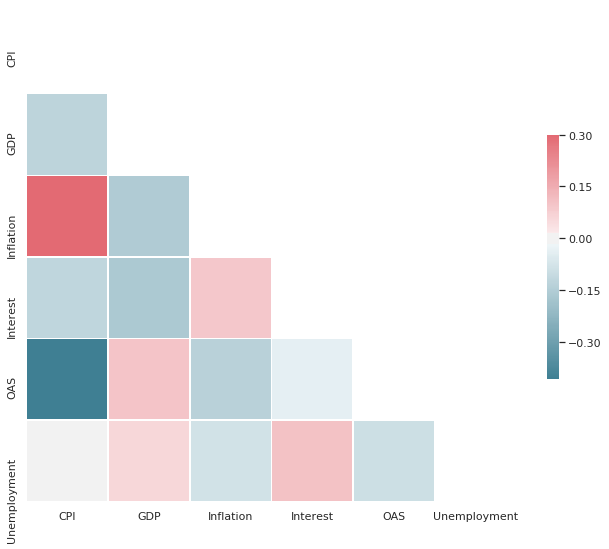

In [43]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

sns.set(style="white")

# Compute the correlation matrix
corr = external[1:].drop(['Date'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
import seaborn as sns; sns.set()

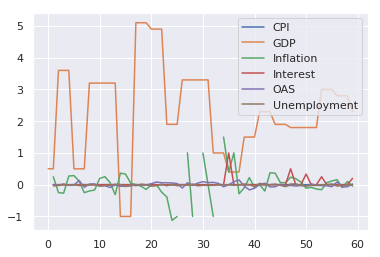

In [46]:
external.set_index("Date")
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")

external.plot()